<a href="https://colab.research.google.com/github/Nolanole/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Josh_Mancuso_DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
#imports:

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
cols = ['A'+str(i) for i in range(1, 17)]
df = pd.read_csv(url, header=None, names=cols, na_values='?')

In [3]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [4]:
df.shape

(690, 16)

In [5]:
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [0]:
#A11 & A15 need to be converted to floats:

df[['A11', 'A15']] = df[['A11', 'A15']].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
#Explore the continuous features first w 2 sample ttests:
#Split into 2 dataframes, one for the approved applications and one for the rejected

df_plus = df[df['A16'] == '+']
df_minus = df[df['A16'] == '-']

In [10]:
#examine summary stats

df_plus.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [11]:
df_minus.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


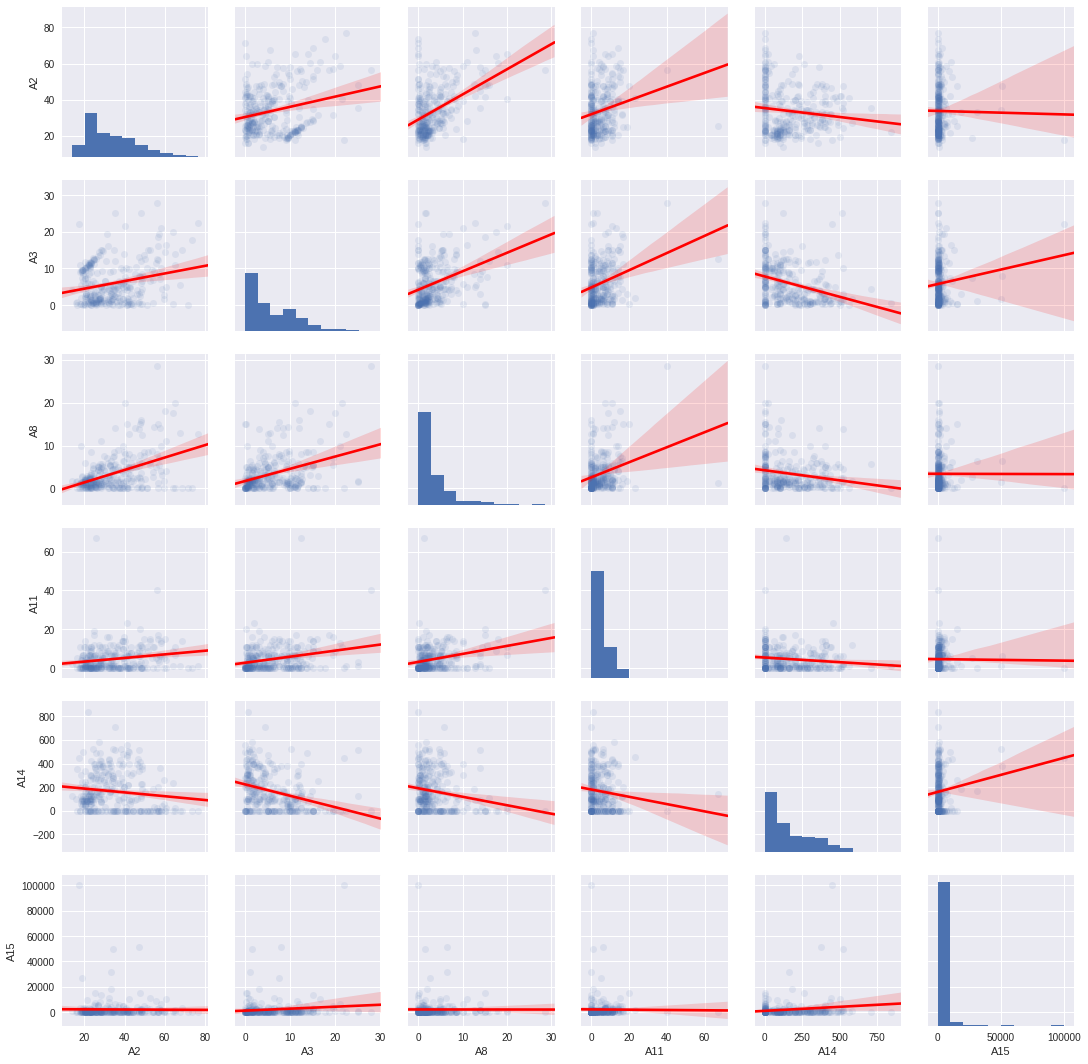

In [12]:
#examine some visualizations for any trends that pop out:

g = sns.pairplot(df_plus, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


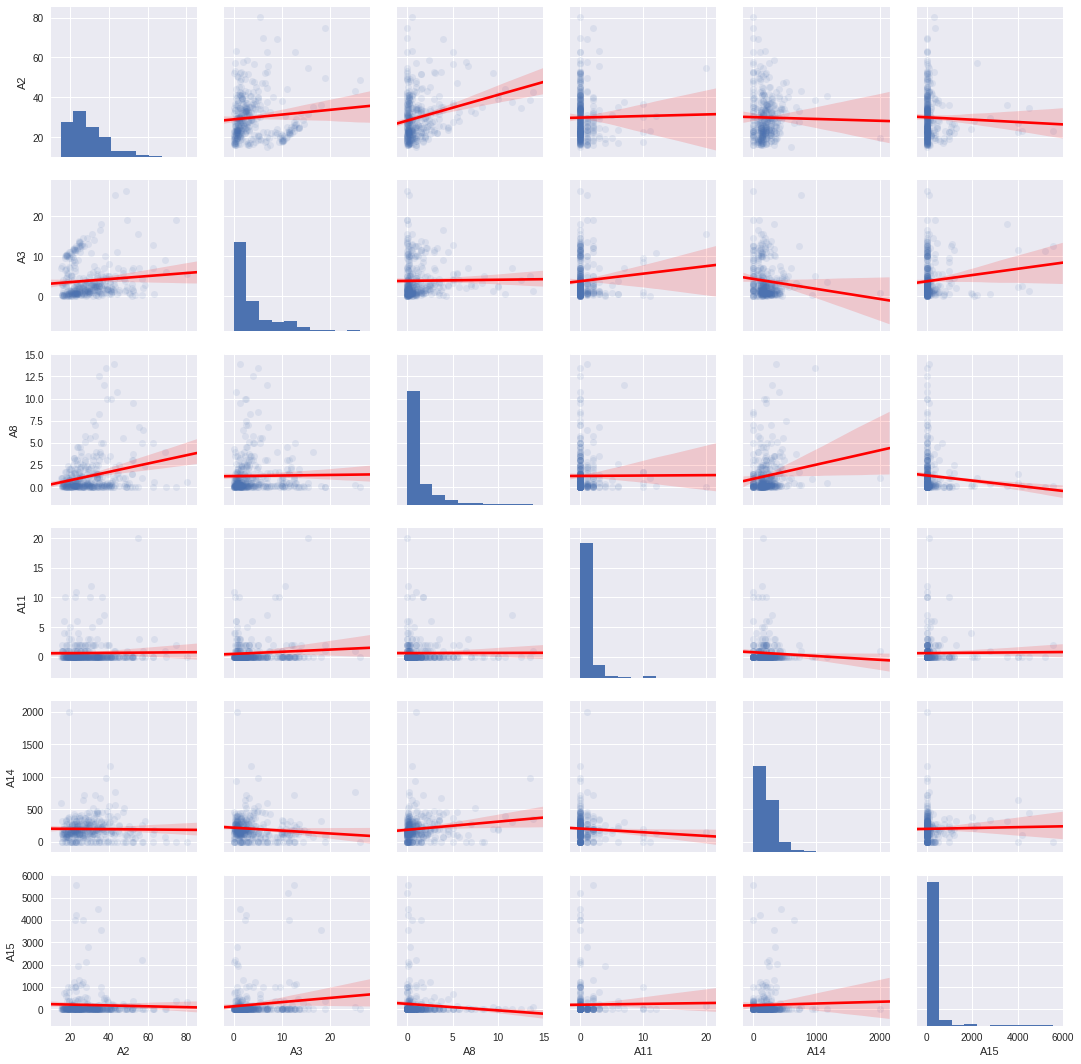

In [13]:
h = sns.pairplot(df_minus, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [0]:
#Now we'll loop over the continuous numeric features and apply 2 sample t-tests

cont_cols = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

ttest_results = []

for col in cont_cols:
  t, p = stats.ttest_ind(df_plus[col], df_minus[col], nan_policy='omit')
  ttest_results.append([col, round(t, 5), p])

In [15]:
#examine the results:

ttest_results

[['A2', 4.29222, 2.0276637071781407e-05],
 ['A3', 5.52998, 4.551680702308068e-08],
 ['A8', 8.93582, 3.6710537401601785e-18],
 ['A11', 11.667, 7.957718568079967e-29],
 ['A14', -2.63583, 0.008586135473979569],
 ['A15', 4.68022, 3.4520256956287944e-06]]

In [16]:
#Next we'll explore the categorical features with contingency tables and Chi-Squared tests

df.describe(exclude=np.number)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [0]:
'''Loop thru the categorical columns and create crosstabs compared to the A16 
column of whether credit was approved or rejected, and apply chi_squared 
contingency test of independence whether the observed frequencues differ 
significantly from expected'''

cat_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

chi2_results = []

for col in cat_cols:
  ct = pd.crosstab(df[col], df['A16'])
  chi2 = stats.chi2_contingency(ct)
  d = {'feature':col, 'chi2-stat':chi2[0], 'p-value':chi2[1], 'degrees_freedom':chi2[2]}
  chi2_results.append(d)

In [0]:
#convert the results  to a dataframe:

df_chi2 = pd.DataFrame(chi2_results)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### T-test Analysis

In [19]:
ttest_results

[['A2', 4.29222, 2.0276637071781407e-05],
 ['A3', 5.52998, 4.551680702308068e-08],
 ['A8', 8.93582, 3.6710537401601785e-18],
 ['A11', 11.667, 7.957718568079967e-29],
 ['A14', -2.63583, 0.008586135473979569],
 ['A15', 4.68022, 3.4520256956287944e-06]]

By looking at the results of the 2 sample t-tests, all of the results are statistically significant at the p < .01 level. The feature in column A11 demonstrates the most extreme difference between the groups, with a positive t-stat of 11.7 and an extremely small p-value (e^(-29)). This shows that the mean for this feature of the group of ppl whose credit applications are approved (the df_plus group) is higher than the mean for this feature for the group whose applications are denied, with an extremely high confidence level (super small p-value). The other continuous features in this dataset also show, to a statistically significant level (p < 0.01) that the approved credit group have a higher mean than the credit-rejected group, with one exception from the feature in the A14 column. The A14 feature shows that the rejected group has a slightly higher mean (t-stat of only -2.6, so the magnitude of the difference in means isnt quite as extreme).

### Chi-Squared Analysis





In [20]:
df_chi2

,chi2-stat,degrees_freedom,feature,p-value
0,0.311283,1,A1,5.768938e-01
1,26.234075,2,A4,2.010680e-06
2,26.234075,2,A5,2.010680e-06
3,98.325203,13,A6,3.499930e-15
4,45.034207,8,A7,3.625453e-07
5,355.203817,1,A9,3.118590e-79
6,143.069562,1,A10,5.675727e-33
7,0.568273,1,A12,4.509459e-01
8,9.191570,2,A13,1.009429e-02


Looking at the dataframe of chi-squared-contingency analysis of the categorical features vs the approved/rejected applications, a couple of results stand out as fairly extreme. The A9 and A10 features have a very high chi2-stat and extremely small p-value. This means we can reject the null hypothesis that these feautres are independent, or that there is no relationship bw that feature and whether or not the credit application is approved. On the other hand, the A1 and A12 features have a very small chi2 statistic and pvalues that are fairly hi (0.5 and 0.4) which are not statistcially significant even at p < 0.05 level. This means we cannot reject the null hypothesis that these features are independent of credit application approval.

In [21]:
#Extreme 

pd.crosstab(df['A9'], df['A16'])

A16,+,-
A9,,
f,23,306
t,284,77


In [22]:
#compared to expected:

stats.chi2_contingency(pd.crosstab(df['A9'], df['A16']))[3]

array([[146.38115942, 182.61884058],
       [160.61884058, 200.38115942]])

In [23]:
#less extreme / not significant:

pd.crosstab(df['A1'], df['A16'])

A16,+,-
A1,,
a,98,112
b,206,262


In [24]:
#compared to expected:

stats.chi2_contingency(pd.crosstab(df['A1'], df['A16']))[3]

array([[ 94.15929204, 115.84070796],
       [209.84070796, 258.15929204]])